In [26]:
using DrWatson
@quickactivate "DrivenKerrResonator"

using HarmonicBalance, Plots, Measures

Threads.nthreads() # check number of threads

10

We would like to investigate the three-wave mixing of the driven Duffing oscillator. This means we can excite the system resonantly if the oscillation frequencies $\omega_1$ and $\omega_2$ fullfil the conditions $\omega_1\pm\omega_2=\pm\omega_0$. Here, we will especially focus on the degenerate three wave mixing, where $\omega_2=\omega_0$ such that $2\omega_0=\omega_1$. This is a very important process in quantum optics, since it allows us to generate photons with a frequency in the visible range from photons with a frequency in the infrared range. This is called frequency doubling and is used in many applications, e.g. in laser pointers.

In [15]:
@variables β α ω ω0 F γ t x(t) # declare constant variables and a function x(t)
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + β*x^2 + α*x^3 + γ*d(x,t) ~ F*cos(ω*t), x)

add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
add_harmonic!(diff_eq, x, 2ω)
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 4 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T)
Parameters: α, ω, β, γ, ω0, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt) + u2(T)*cos(2ωt) + v2(T)*sin(2ωt)

Harmonic equations:

γ*Differential(T)(u1(T)) + (ω0^2)*u1(T) + (3//4)*α*(u1(T)^3) + β*u1(T)*u2(T) + β*v1(T)*v2(T) + (2//1)*ω*Differential(T)(v1(T)) + γ*ω*v1(T) + (3//4)*α*(v1(T)^2)*u1(T) + (3//2)*α*(u2(T)^2)*u1(T) + (3//2)*α*(v2(T)^2)*u1(T) - (ω^2)*u1(T) ~ F

γ*Differential(T)(v1(T)) + (ω0^2)*v1(T) + (3//4)*α*(v1(T)^3) + β*u1(T)*v2(T) + (3//4)*α*(u1(T)^2)*v1(T) + (3//2)*α*(u2(T)^2)*v1(T) + (3//2)*α*(v2(T)^2)*v1(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) - β*u2(T)*v1(T) ~ 0

(ω0^2)*u2(T) + γ*Differential(T)(u2(T)) + (3//4)*α*(u2(T)^3) + (1//2)*β*(u1(T)^2) + (4//1)*ω*Differential(T)(v2(T)) + (2//1)*γ*ω*v2(T) + (3//2)*α*(u1(T)^2)*u2(T) + (3//2)*α*(v1(T)^2)*u2(T) + (3//4)*α*(v2(T)^2)*u2(T) - (1//2)*β*(v1(T)^2) - (4//1)*(ω^2)*u2(T) ~ 0

(ω0^2)*v2(T) + γ*Differential(T)(v2(T)) + (3//4)*

If we only have a cubic nonlineariy $\alpha$, we observe the normal duffing oscillator response with no response at $2\omega$.

┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! branch 1
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106
┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! branch 3
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106
┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! 
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106
┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! 
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106
┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! branch 2
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\Harm

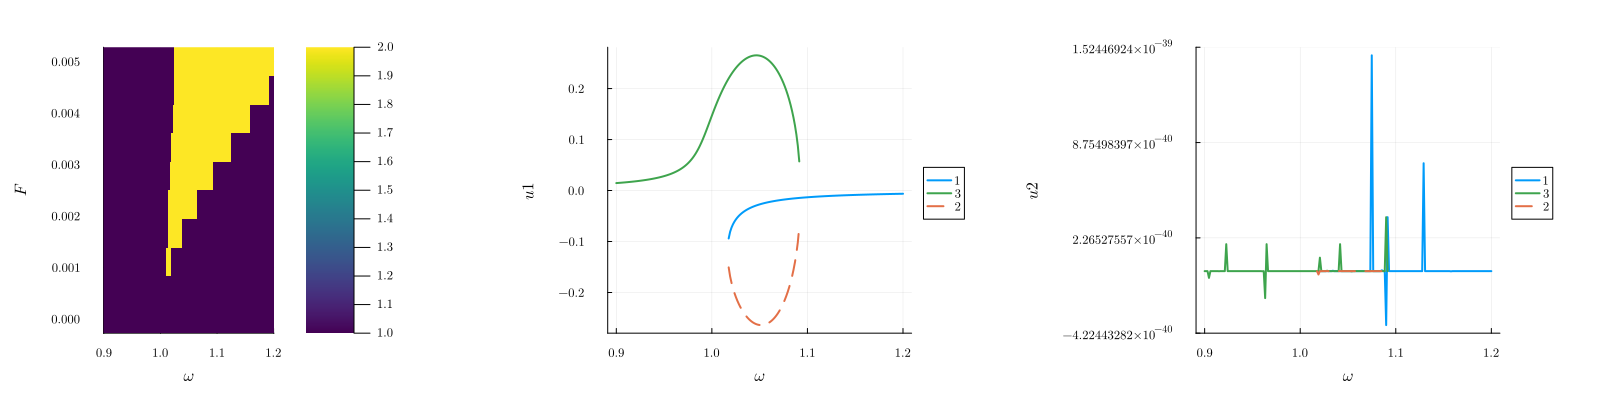

In [56]:
varied = (ω => range(0.9, 1.2, 200), F => range(1e-6, 0.005, 10)) # range of parameter values
fixed = (α => 1.0, β => 0.0, ω0 => 1.0, γ => 0.005) # fixed parameters

result = get_steady_states(harmonic_eq, varied, fixed, show_progress=false, threading=true, random_warmup=false) # solve for steady states

p1 = plot_phase_diagram(result, class="stable") # plot phase diagram 
p2 = plot(result, y = "u1", cut = F => 0.0025)
p3 = plot(result, y = "u2", cut = F => 0.0025)
plot(p1, p2, p3, layout = (1,3), size = (1600, 400), margin = 10mm)

If we both have a cubic $\alpha$ and a quadratic $\beta$ nonlinearity, we observe the three-wave mixing response with a light response at $2\omega$.

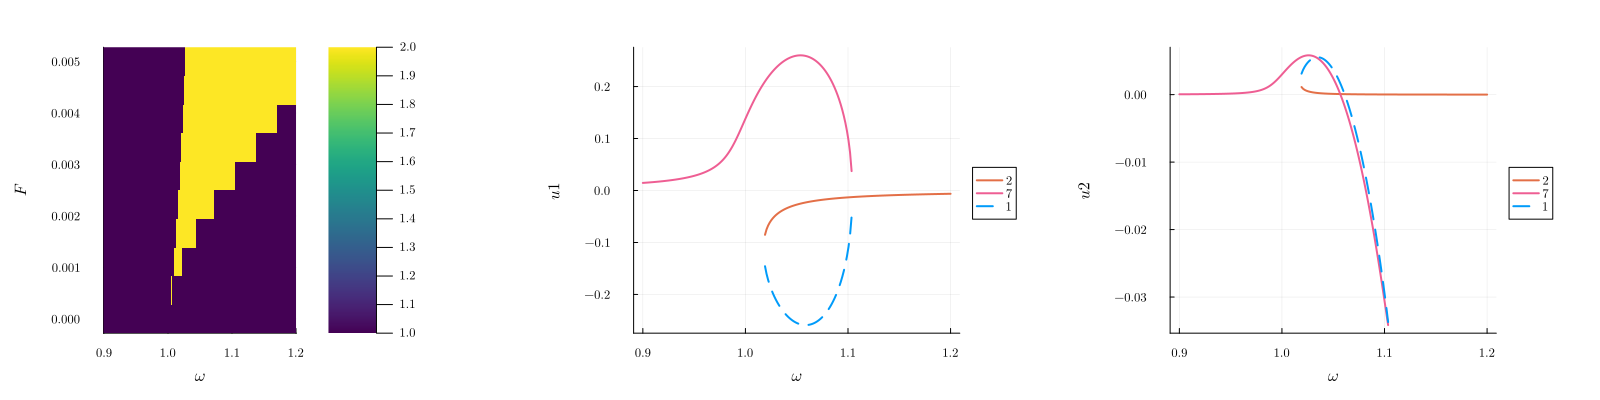

In [57]:
varied = (ω => range(0.9, 1.2, 200), F => range(1e-6, 0.005, 10)) # range of parameter values
fixed = (α => 1.0, β => 1.0, ω0 => 1.0, γ => 0.005) # fixed parameters

result = get_steady_states(harmonic_eq, varied, fixed, show_progress=false, threading=true, random_warmup=false) # solve for steady states

p1 = plot_phase_diagram(result, class="stable") # plot phase diagram 
p2 = plot(result, y = "u1", cut = F => 0.0025)
p3 = plot(result, y = "u2", cut = F => 0.0025)
plot(p1, p2, p3, layout = (1,3), size = (1600, 400), margin = 10mm)

What if we only have a quadratic nonlinearity $\beta$? We will see that we observe a light response at $2\omega$ as well, but with a different amplitude.

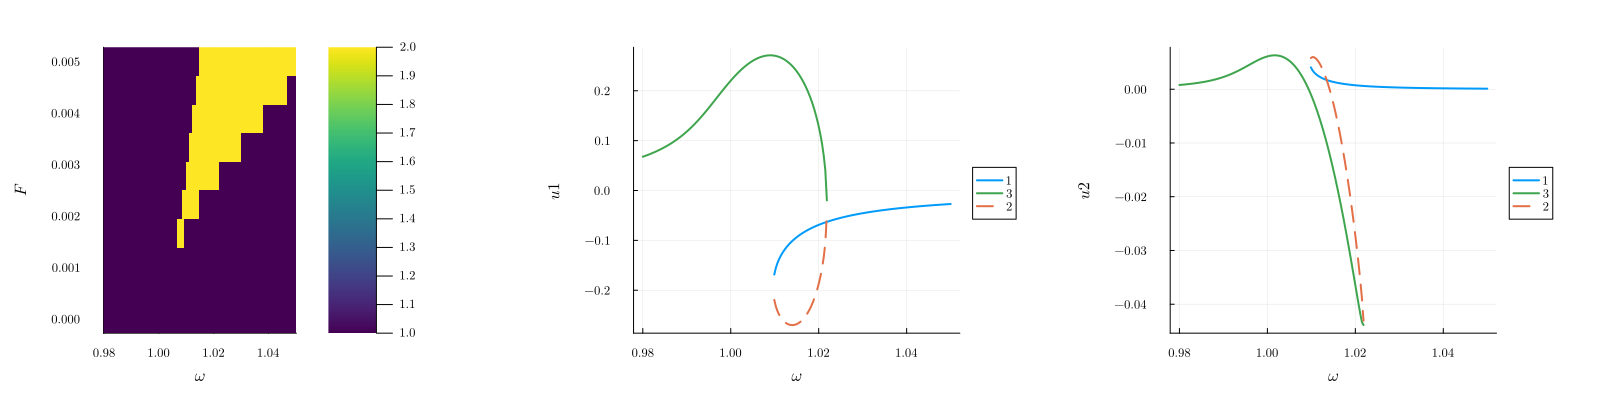

In [60]:
varied = (ω => range(0.98, 1.05, 200), F => range(1e-6, 0.005, 10)) # range of parameter values
fixed = (α => 0.0, β => 1.0, ω0 => 1.0, γ => 0.005) # fixed parameters

result = get_steady_states(harmonic_eq, varied, fixed, show_progress=false, threading=true, random_warmup=false) # solve for steady states

p1 = plot_phase_diagram(result, class="stable") # plot phase diagram 
p2 = plot(result, y = "u1", cut = F => 0.0025)
p3 = plot(result, y = "u2", cut = F => 0.0025)
plot(p1, p2, p3, layout = (1,3), size = (1600, 400), margin = 10mm)

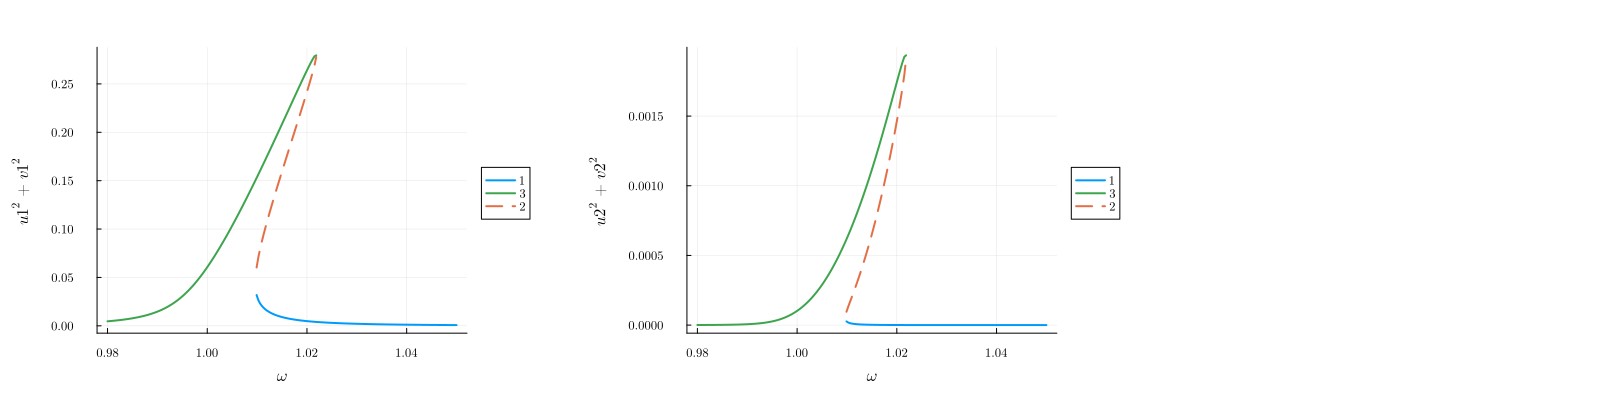

In [61]:
p1 = plot(result, y = "u1^2+v1^2", cut = F => 0.0025)
p2 = plot(result, y = "u2^2+v2^2", cut = F => 0.0025)
plot(p1, p2, layout = (1,3), size = (1600, 400), margin = 10mm)